# SWE Changes in Anchorage, Alaska

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Introduction 
Snow packs act as frozen water towers, allowing the melt to run off. Storage and snow melt is an important part of the water budget and a critical resource for some areas. Knowing when to expect peak snow melt would be important as climate change effects are deepened making water resources sparse in some areas and overly abundant in others. 

### Specific research question: 
How has the SWE peak changed in timing in Anchorage, Alaska? 

### Site Description
(INSERT MAP) 

Anchorage is a city in the south-central region of Alaska, located on the coast of the Cook Inlet. It is the largest city in Alaska with a population of around 288,000 people in the metropolitan area. Anchorage serves as a hub for transportation, commerce, and culture in the state, and is surrounded by beautiful natural landscapes. 

Anchorage has a subarctic climate, with long, cold winters and mild summers. The city experiences heavy snowfall during the winter months. 

### Data Description
The data to be utilized is from the USDA. This dataset has a period of record of daily values from 2005-2023, the entirety of which will be analyzed. This data comes from a single gauge (#SNOTEL 1070) located in Anchorage Hillside, Alaska. This dataset includes year and snow water equivalent in inches measured daily instantesouly at the beginning of the day. 

URL: https://wcc.sc.egov.usda.gov/reportGenerator/view_csv/customGroupByMonthReport/daily/1070:AK:SNTL%7Cid=%22%22%7Cname/POR_BEGIN,POR_END/WTEQ::value 

In [2]:
#load and provide initial plot of raw data 
infile_name='WTEQ__value.txt'
import pandas as pd
fig_title='SWE'
data = pd.read_csv(infile_name, comment="#", delimiter =",", na_values=["Ice", "Bkw"], dtype={"Water Year": float})
monthlist=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
data=data[1:]
data[['Water Year', 'Day']] = data[['Water Year', 'Day']].apply(pd.to_numeric, errors='coerce')

print(data)


     Water Year   Day  Oct  Nov  Dec  Jan   Feb   Mar  Apr  May  Jun  Jul  \
1        2005.0   1.0  NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  0.0   
2        2005.0   2.0  NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  0.0   
3        2005.0   3.0  NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  0.0   
4        2005.0   4.0  NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  0.0   
5        2005.0   5.0  NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  0.0   
..          ...   ...  ...  ...  ...  ...   ...   ...  ...  ...  ...  ...   
585      2023.0  27.0  0.4  2.8  7.0  7.8  10.4  11.3  NaN  NaN  NaN  NaN   
586      2023.0  28.0  0.4  2.8  7.0  7.8  10.4   NaN  NaN  NaN  NaN  NaN   
587      2023.0  29.0  0.4  2.8  7.1  7.8   NaN   NaN  NaN  NaN  NaN  NaN   
588      2023.0  30.0  0.4  2.8  7.1  7.9   NaN   NaN  NaN  NaN  NaN  NaN   
589      2023.0  31.0  0.4  NaN  7.1  7.9   NaN   NaN  NaN  NaN  NaN  NaN   

     Aug  Sep  
1    0.0  0.0  
2    0.0  0.0  
3    0.0  0.0  
4    0.0  0

In [3]:
# Fill missing values with the median of the column
data.fillna(data.median(), inplace=True)

# Drop rows with missing values in 'Water Year' column
data.dropna(subset=['Water Year'], inplace=True)

# Drop rows with missing values in 'Day' column
data.dropna(subset=['Day'], inplace=True)

# Initialize an empty DataFrame
bigdata = pd.DataFrame()

for i, month in enumerate(monthlist):
    datamonth=data[['Water Year','Day',month]].copy()
    datamonth['Month']=i+1
    datamonth['Snow']=datamonth[month]
    datamonth.drop(columns={month},inplace=True)
    try: 
        bigdata=pd.concat([bigdata,datamonth])
    except: 
        bigdata=datamonth
bigdata.rename(columns={'Day':'day','Month':'month'},inplace=True)        

bigdata

,Water Year,day,month,Snow
1,2005.0,1.0,1,5.45
2,2005.0,2.0,1,5.45
3,2005.0,3.0,1,5.45
4,2005.0,4.0,1,5.45
5,2005.0,5.0,1,5.45
...,...,...,...,...
585,2023.0,27.0,12,7.0
586,2023.0,28.0,12,7.0
587,2023.0,29.0,12,7.1
588,2023.0,30.0,12,7.1


In [4]:
#Create a calander year column
# Create a new column "wateryear" in the dataframe
bigdata['year'] = np.where(bigdata['month'] >= 10, bigdata['Water Year'] - 1, bigdata['Water Year'])

bigdata['year']=bigdata['year'].astype('int64')

# Create a datetime column
bigdata['date'] = pd.to_datetime(bigdata[['year', 'month', 'day']], errors='coerce')

bigdata.dtypes

Water Year           float64
day                  float64
month                  int64
Snow                  object
year                   int64
date          datetime64[ns]
dtype: object

In [5]:


# Drop the 'Water Year', 'Month', and 'Day' columns
bigdata.drop(columns=['Water Year', 'month', 'day','year'], inplace=True)

# Set the 'date' column as the index
bigdata.set_index('date', inplace=True)

print(bigdata.head())

            Snow
date            
2005-01-01  5.45
2005-01-02  5.45
2005-01-03  5.45
2005-01-04  5.45
2005-01-05  5.45


Text(0.5, 1.0, 'SWE')

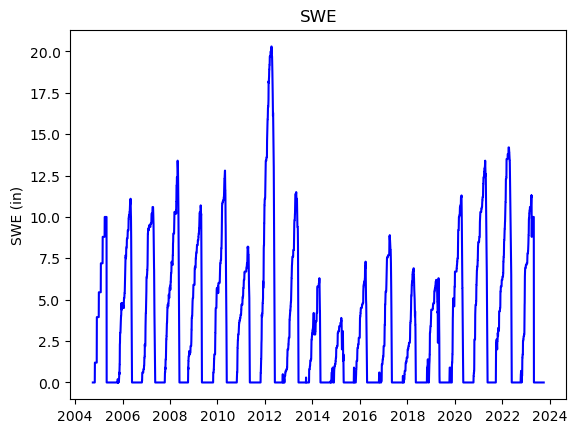

In [7]:
fig, ax = plt.subplots()
bigdata.sort_index(inplace=True)
ax.plot(bigdata['Snow'],  # x = dataframe index (date), y = precip in mm
        'b-', label ='SWE') 
ax.set_ylabel('SWE (in)') 
ax.set_title(fig_title)


plan analysis 

### Discussion 
Hoping to see that peak SWE timing is changing in one way or another, either later or earlier each year. Can talk about what this means for water budget and how snow dependant areas will be affected? 